# Netscience Collaboration Network

data source: http://www-personal.umich.edu/~mejn/netdata/

citation:
```
@article{newman2006finding,
     title={Finding community structure in networks using the eigenvectors of matrices},
     author={Newman, Mark EJ},
     journal={Physical review E},
     volume={74},
     number={3},
     pages={036104},
     year={2006},
     publisher={APS}
}
```

In [34]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from layout import Layout

### Construct graph from network data

In [35]:
G_all = nx.read_gml("netscience.gml")
nx.info(G_all)

'Graph with 1589 nodes and 2742 edges'

In [36]:
LCC = max(nx.connected_components(G_all), key=len)
G = G_all.subgraph(LCC).copy()
nx.info(G)

'Graph with 379 nodes and 914 edges'

In [37]:
pos = nx.spring_layout(G, dim=3)

In [38]:
layout = Layout(G, pos)

In [39]:
layout.node_names = list(G.nodes)

In [40]:
weights = [G[n1][n2]["value"] for n1, n2 in G.edges]
min_weight = np.min(weights)
max_weight = np.max(weights)

max_glow = 255
min_glow = 100

def get_glow(weight):
    k = (max_glow - min_glow) / (max_weight - min_weight)
    d = min_glow - k * min_weight
    return int(k * weight + d)

layout.edge_colors = [(255, 255, 255, get_glow(G[n1][n2]["value"])) for n1, n2 in G.edges]

In [41]:
layout.node_table

,x,y,z,r,g,b,a,name
0,0.159228,0.560701,0.287647,31,119,180,100,"FLORIA, L"
1,0.418662,0.602231,0.381540,31,119,180,100,"MONTOYA, J"
2,0.706355,0.533246,0.634793,31,119,180,100,"ALBERT, I"
3,0.784941,0.726340,0.698326,31,119,180,100,"DUNNE, J"
4,0.635833,0.235149,0.568634,31,119,180,100,"BUCOLO, M"
...,...,...,...,...,...,...,...,...
374,0.402650,0.579245,0.357020,31,119,180,100,"THERAULAZ, G"
375,0.266119,0.563720,0.643105,31,119,180,100,"CATANZARO, M"
376,0.197581,0.658857,0.320559,31,119,180,100,"VAZQUEZ, A"
377,0.173299,0.239020,0.410293,31,119,180,100,"OSIPOV, G"


In [42]:
layout.edge_table

,i,j,r,g,b,a
0,0,46,255,255,255,112
1,0,29,255,255,255,112
2,1,49,255,255,255,162
3,2,101,255,255,255,112
4,2,358,255,255,255,112
...,...,...,...,...,...,...
909,341,351,255,255,255,106
910,342,363,255,255,255,104
911,352,353,255,255,255,101
912,367,376,255,255,255,106


In [43]:
layout.write(node_file_path="collaboration_nodes.csv", edge_file_path="collaboration_edges.csv")

### Persistent Homology

https://snap.stanford.edu/social2012/papers/carstens-horadam.pdf

In [44]:
filtration = []
thresholds = np.linspace(min_weight, max_weight, len(G))
for threshold in thresholds:
    filter_edge = lambda n1, n2: G[n1][n2]["value"] >= threshold
    view = nx.subgraph_view(G, filter_edge=filter_edge).copy()
    filtration.append(view)

betti_0 = [nx.number_connected_components(view) for view in filtration]
w_star = thresholds[::-1][np.argmin(betti_0[::-1])]
n_edges = [view.number_of_edges() for view in filtration]

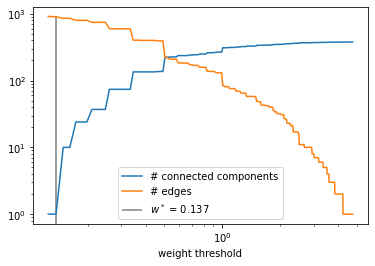

In [45]:
plt.loglog(thresholds, betti_0, label="# connected components")
plt.loglog(thresholds, n_edges, label="# edges")
plt.vlines(w_star, 0, n_edges[0], color="black", alpha=0.5, label=fr"$w^*$ = {w_star:.3g}")
plt.xlabel("weight threshold")
plt.legend()
plt.show()